## Kaggle.json için Drive Bağlantısı

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import shutil

kaggle_api_path = '/content/drive/MyDrive/kaggle.json'

kaggle_dir = '/root/.kaggle'

os.makedirs(kaggle_dir, exist_ok=True)

shutil.copy(kaggle_api_path, f'{kaggle_dir}/kaggle.json')

os.chmod(f'{kaggle_dir}/kaggle.json', 0o600)

Mounted at /content/drive


## Dataset İndirilmesi

In [ ]:
!kaggle datasets download -d amjadzhour/car-price-prediction
!unzip -q car-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/amjadzhour/car-price-prediction
License(s): CC0-1.0
  0% 0.00/19.4k [00:00<?, ?B/s]
100% 19.4k/19.4k [00:00<00:00, 61.3MB/s]


## Kütüphaneleri Yükleme ve Veriyi Okuma

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Car_Price_Prediction.csv")
df.head()


,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


## Veri Ön İşleme

In [ ]:
print(df.isnull().sum())

print(df.select_dtypes(include='object').columns)

from sklearn.preprocessing import LabelEncoder

label_cols = ['Make', 'Model', 'Fuel Type', 'Transmission']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


Make            0
Model           0
Year            0
Engine Size     0
Mileage         0
Fuel Type       0
Transmission    0
Price           0
dtype: int64
Index(['Make', 'Model', 'Fuel Type', 'Transmission'], dtype='object')


## Özellik ve Hedef Ayrımı

In [ ]:
X = df.drop("Price", axis=1)
y = df["Price"]

## Veriyi Eğitim ve Test Olarak Ayırma

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Özellik Ölçekleme

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modellerin Eğitilmesi ve Karşılaştırılması

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Değerlendirme
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Linear Regression R2: 0.8210219487726
Random Forest R2: 0.7921627323819376


In [ ]:
!pip install xgboost --quiet
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


XGBoost R2: 0.781297799148684


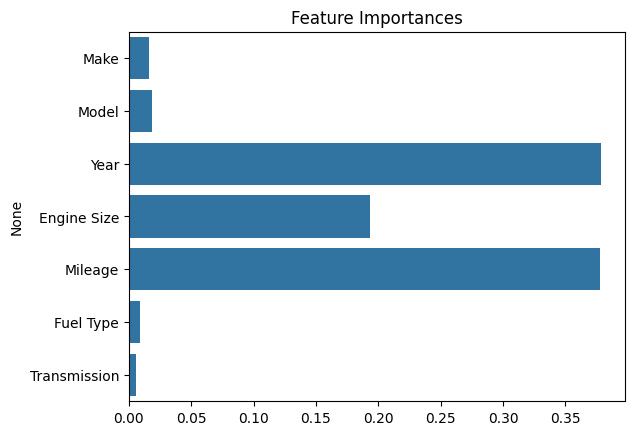

In [ ]:
importances = rf.feature_importances_
feature_names = df.drop("Price", axis=1).columns

sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()

In [ ]:
df["Car_Age"] = 2025 - df["Year"]
df.drop("Year", axis=1, inplace=True)  # Artık "Year" değişkenine ihtiyacımız yok

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

df = remove_outliers(df, "Mileage")
df = remove_outliers(df, "Price")


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Make', 'Model', 'Fuel Type', 'Transmission']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop("Price", axis=1)
y = df["Price"]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost R2:", r2_score(y_test, y_pred_xgb))


Linear Regression R2: 0.8422498165240215
Random Forest R2: 0.8096298488417732
XGBoost R2: 0.7894606867842584


## Polynomial Regression Model Denemesi

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)


y_pred_poly = lr_poly.predict(X_test_poly)

print("Polynomial Regression R2:", r2_score(y_test, y_pred_poly))


Polynomial Regression R2: 0.8391067284169094
